In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

##  Beta-Weighting an EEM Position

These values are from 07-27/2020

EEM Price = 43.81 ($E$)<br>
SPY price = 323.22 ($S$)

Delta in EEM = 22.31 ($\Delta_E$)

In [2]:
#  Pull in raw data.  Data is from Yahoo finance.  We are using five years of historical data to calculate the beta
#  We also need to calculate the daily percent change in the two underlyings.
EEM = pd.read_csv('EEM.csv');  EEM['pct'] = EEM['Close'].pct_change()
SPY = pd.read_csv('SPY.csv');  SPY['pct'] = SPY['Close'].pct_change()

#  Because the linear regression code cannot handle NaN, we delete the first element of the Numpy arrays
eem_pct = EEM['pct'].to_numpy(); eem_pct = np.delete(eem_pct, 0)
spy_pct = SPY['pct'].to_numpy(); spy_pct = np.delete(spy_pct, 0)

##  Step 1
Calculate $\beta$ for the stok.  This is the slope of the regression line.

###  Notation and Procedure
$dE$  is differential change in EEM price<br>
$dS$ is differential change in SPY price

Let our deltas in EEM be the derivative of the option position with respect to the price of EEM,
$$\Delta_E = \frac{dC}{dE}.$$

The beta of the stock can be though of as the raitio of the fractional changes in price,
$$\beta = \frac{dE}{dS}\frac{S}{E}.$$

We want to recast the top equation in therms of the SPY price.  That is our SPY-weighted delta.  After some algebra, we have, 
$$\Delta_S = \frac{dC}{dS} = \frac{\beta E \Delta_E}{S}.$$

In general, the beta weight delta can be written as,
$$\frac{\beta \times \Delta \times \mbox{Stock Price}}{\mbox{Index Price}}.$$

beta =  0.9689665505647693
Spy-weighted delta =  2.9301063436210972


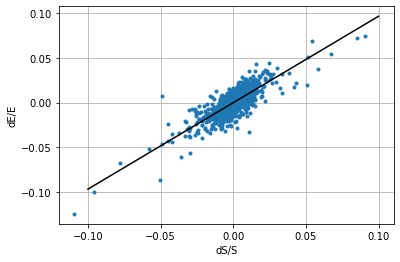

In [3]:
#  Plot the raw percent change data.
plt.plot(spy_pct, eem_pct, '.')
plt.grid(True)
plt.xlabel('dS/S')
plt.ylabel('dE/E')

#  Do the linear regression.  We are interested in the slope as that is our beta.
slope, intercept, r_value, p_value, std_err =  linregress(spy_pct, eem_pct)
print('beta = ', slope)
beta = slope

#  Plot the regression line on top of our raw data.
x = np.linspace(-0.1, 0.1)
y = slope * x + intercept
plt.plot(x, y, 'k')

#  The delta of our option position as well as the prices of both underlyings
eem_delta = 22.31
E = 43.81
S = 323.22

#  Calculate our beta-weighted delta
spy_eq_delta = slope * E * eem_delta / S
print('Spy-weighted delta = ', spy_eq_delta)